In [1]:
import pandas as pd
import plotly.express as px
import plotly.colors as C
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)

In [2]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding= "latin-1")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#Get Categorical columns

In [4]:
cat_cols= [col for col in df.columns if df[col].dtype=='object']
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
#dataset information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Check null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Drop the custoerID column
df= df.drop(['customerID'], axis=1)

In [9]:
#change total charges to numeric datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#display null value

df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
#drp rows where tenure 0
df= df.drop(labels=df[df['tenure']==0].index,axis=0)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
#EXPLORATORY DATA ANALYSIS

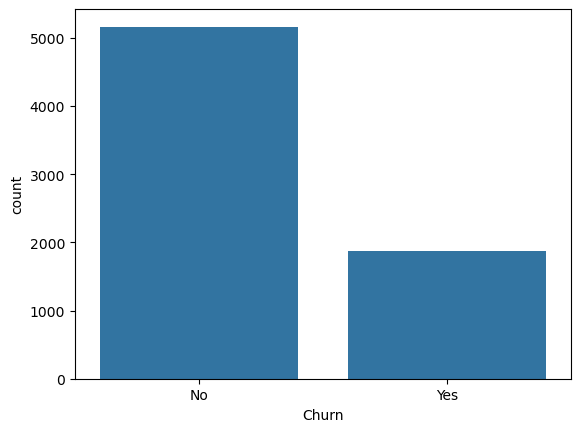

In [12]:
sns.countplot(x= 'Churn', data=df);

# dataset is  slightly  imbalance. Suggest to  use sampling techniques to  balance the dataset

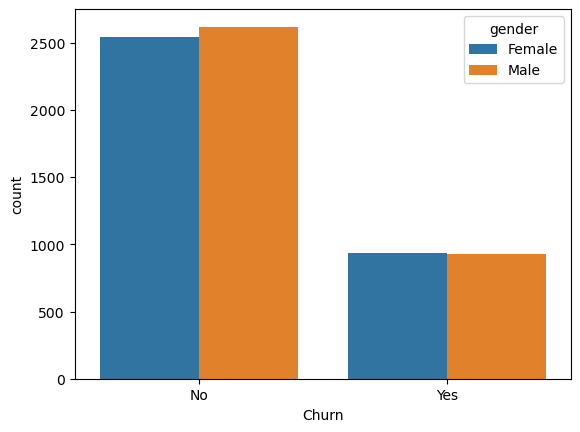

In [13]:
sns.countplot(x='Churn', hue= 'gender', data= df);

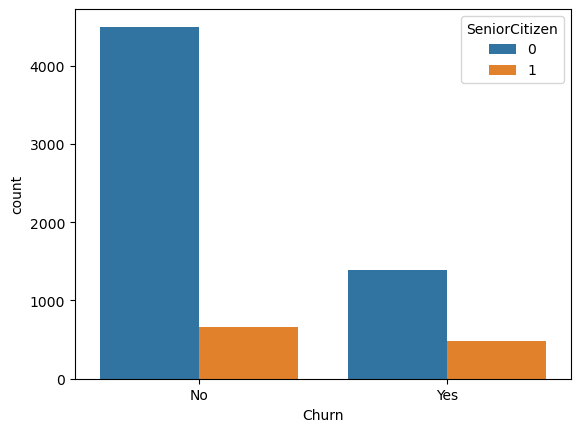

In [14]:
sns.countplot(x= 'Churn', hue = 'SeniorCitizen', data=df);

# Senior citizen are more likely to  churn

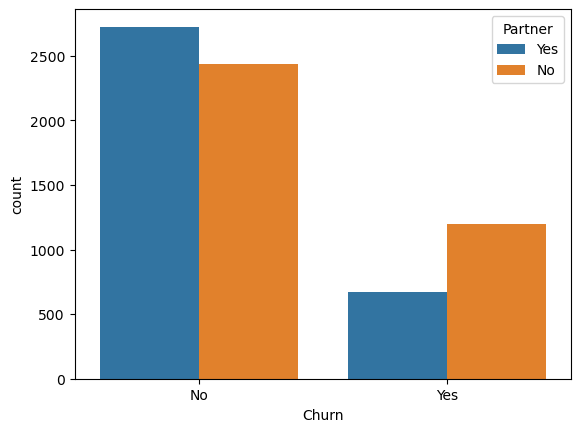

In [15]:
sns.countplot(x= 'Churn', hue = 'Partner', data=df);

# People who  does'nt  have partner more  likely  to  get  churn

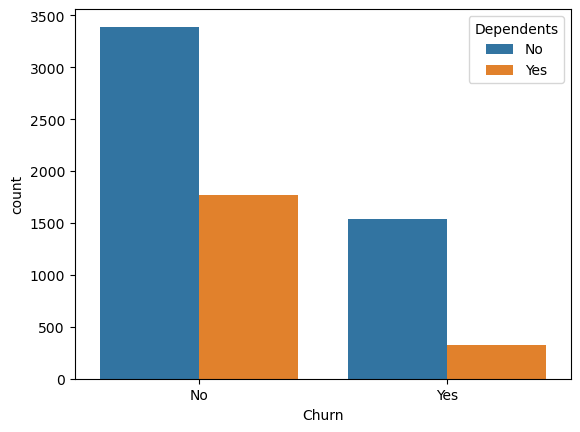

In [34]:
sns.countplot(x= 'Churn', hue = 'Dependents', data=df);

# People ho  doest have any  dependants or single person nore  likely  to  be churn
#  if the customer  has a family  all  the  prefer to use the same service and retention is high

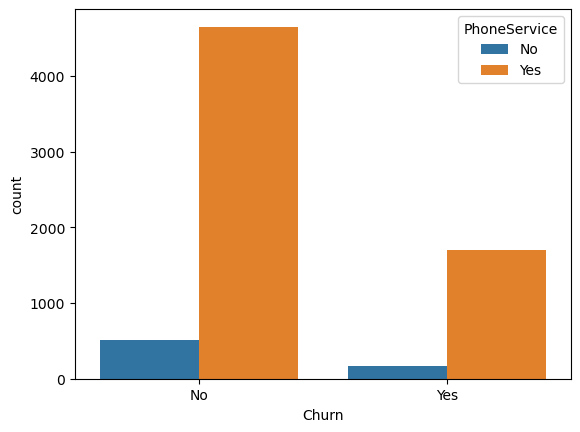

In [16]:
sns.countplot(x= 'Churn', hue = 'PhoneService', data=df);

# People ewho  have more Phone service more  likely  to  churn

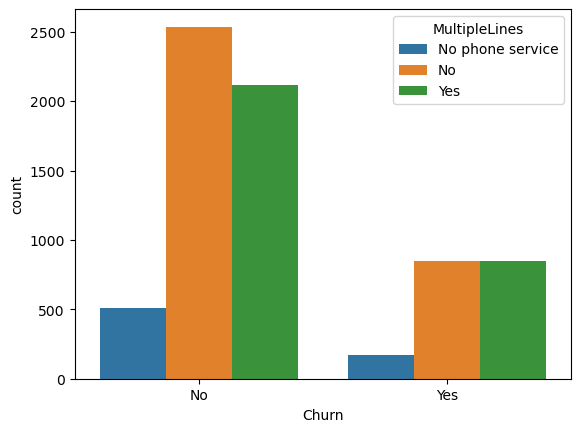

In [17]:
sns.countplot(x= 'Churn', hue = 'MultipleLines', data=df);

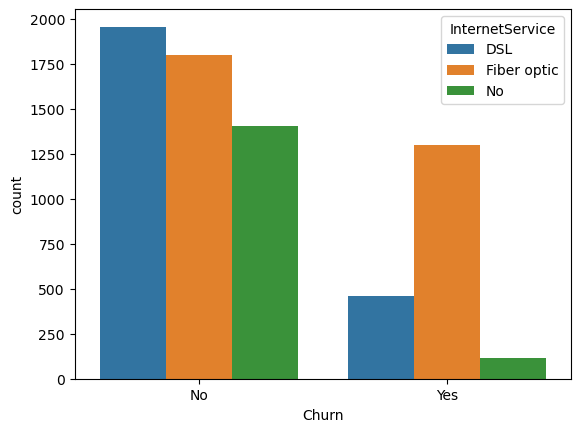

In [39]:
sns.countplot(x= 'Churn', hue = 'InternetService', data=df);

# Those who  have opted  for  fibre optics are more likely to churn and Who have DSl service are more   retention

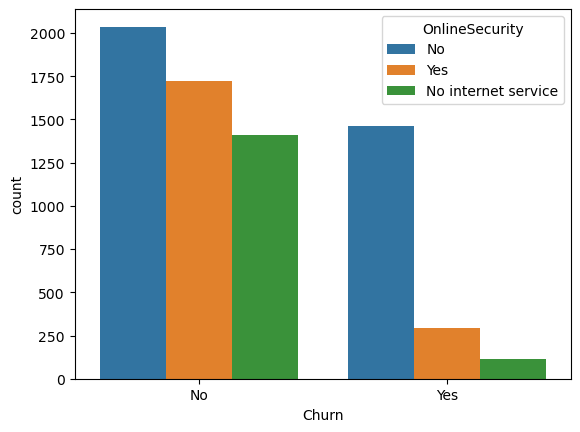

In [18]:
sns.countplot(x= 'Churn', hue = 'OnlineSecurity', data=df);

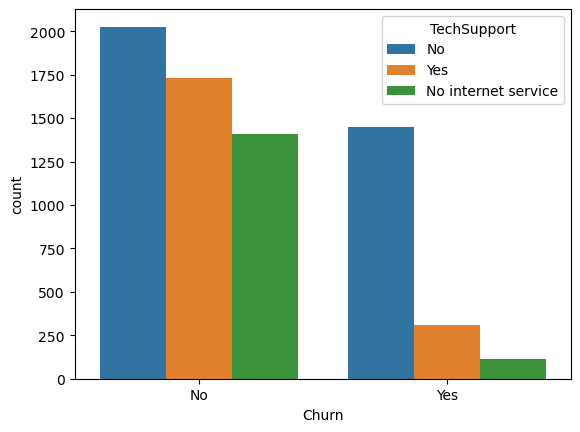

In [19]:
sns.countplot(x= 'Churn', hue = 'TechSupport', data=df);

# People who doest have tech support are more likely to churn

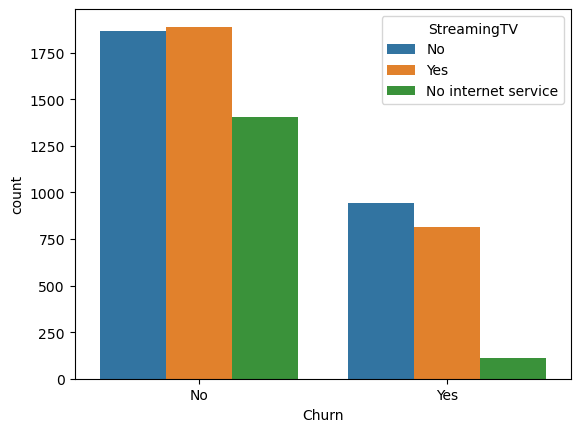

In [20]:
sns.countplot(x= 'Churn', hue = 'StreamingTV', data=df);

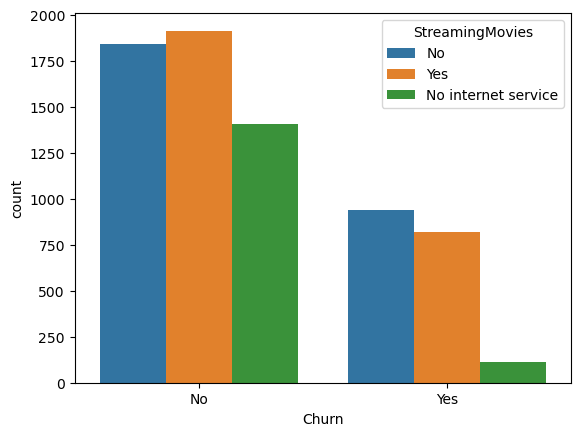

In [21]:
sns.countplot(x= 'Churn', hue = 'StreamingMovies', data=df);

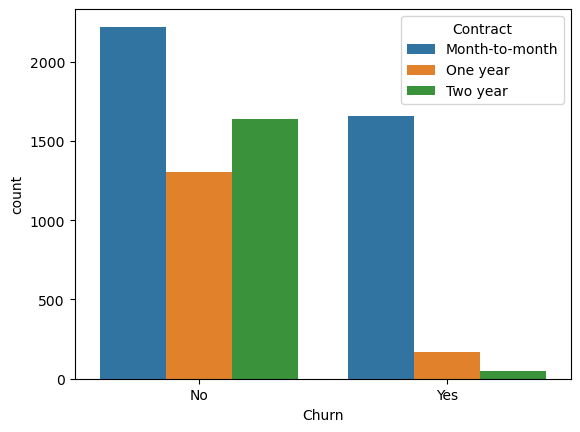

In [22]:
sns.countplot(x= 'Churn', hue = 'Contract', data=df);

# People who are on monthly contract are more likely to churn and people who are  yearly contract less likely to churn

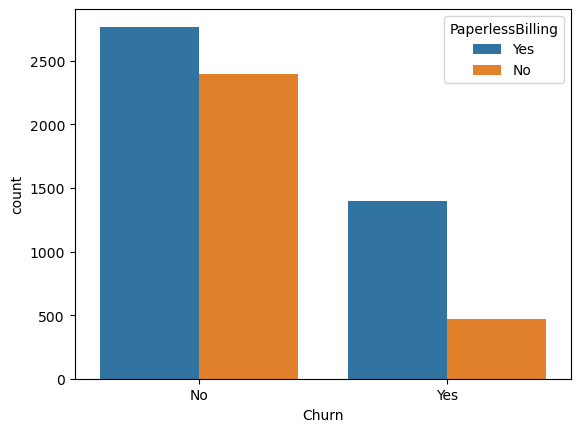

In [23]:
sns.countplot(x= 'Churn', hue = 'PaperlessBilling', data=df);

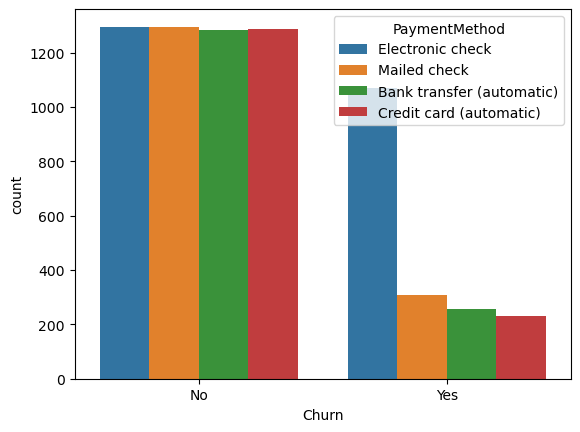

In [24]:
sns.countplot(x= 'Churn', hue = 'PaymentMethod', data=df);

# People who  have opted for electronic check are more  likely  to  churn

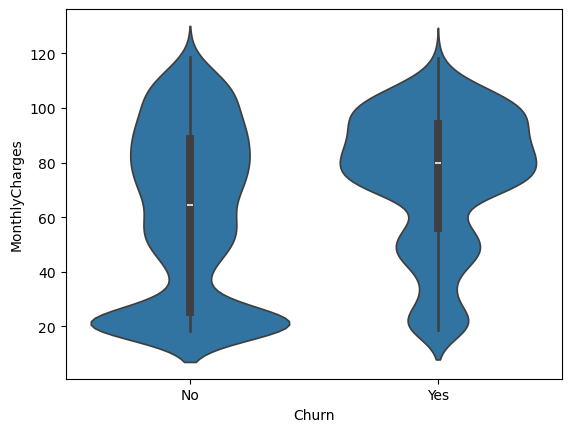

In [26]:
sns.violinplot(x='Churn', y= 'MonthlyCharges', data= df);

# People who  have high monthly  charges are  more  likely  o churn

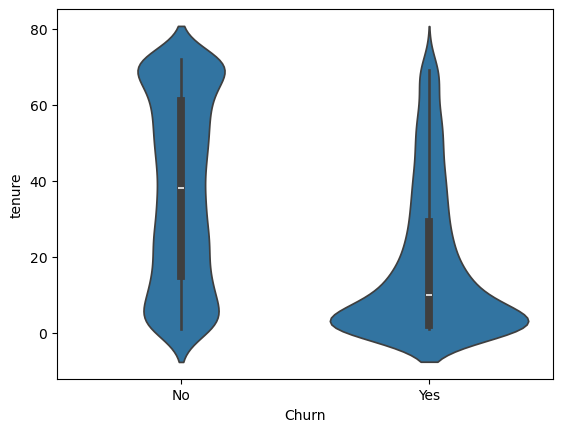

In [27]:
sns.violinplot(x='Churn', y= 'tenure', data=df);

# People who are on low tenure or who have subscribed  for less no. of months are more likely to chur

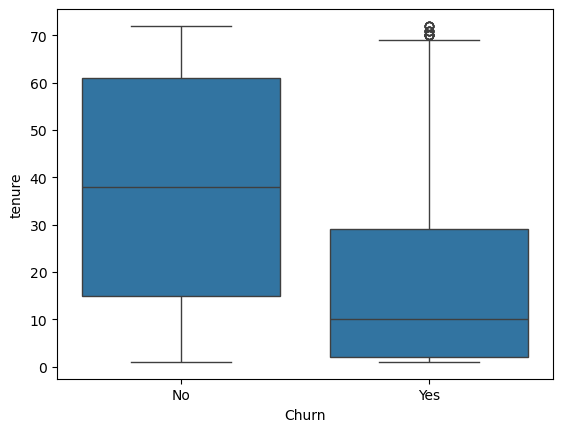

In [28]:
sns.boxplot(x='Churn', y= 'tenure', data=df);

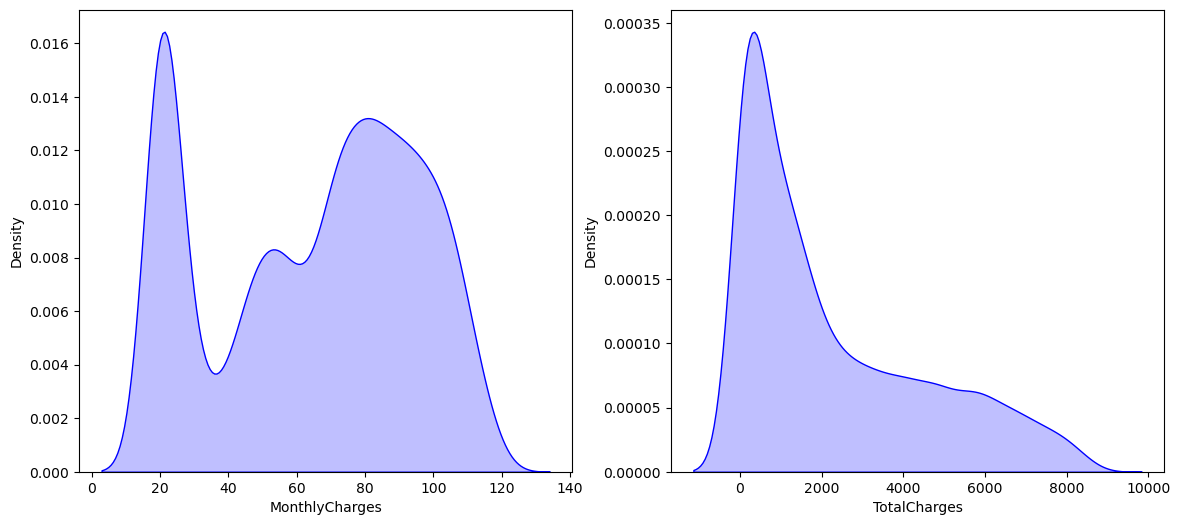

In [59]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.kdeplot(df['MonthlyCharges'], ax= axes[0], color = 'blue', shade= True)

sns.kdeplot(df['TotalCharges'], ax= axes[1], color = 'blue', shade= True)
fig.show()

# Correlation metrics


<Axes: >

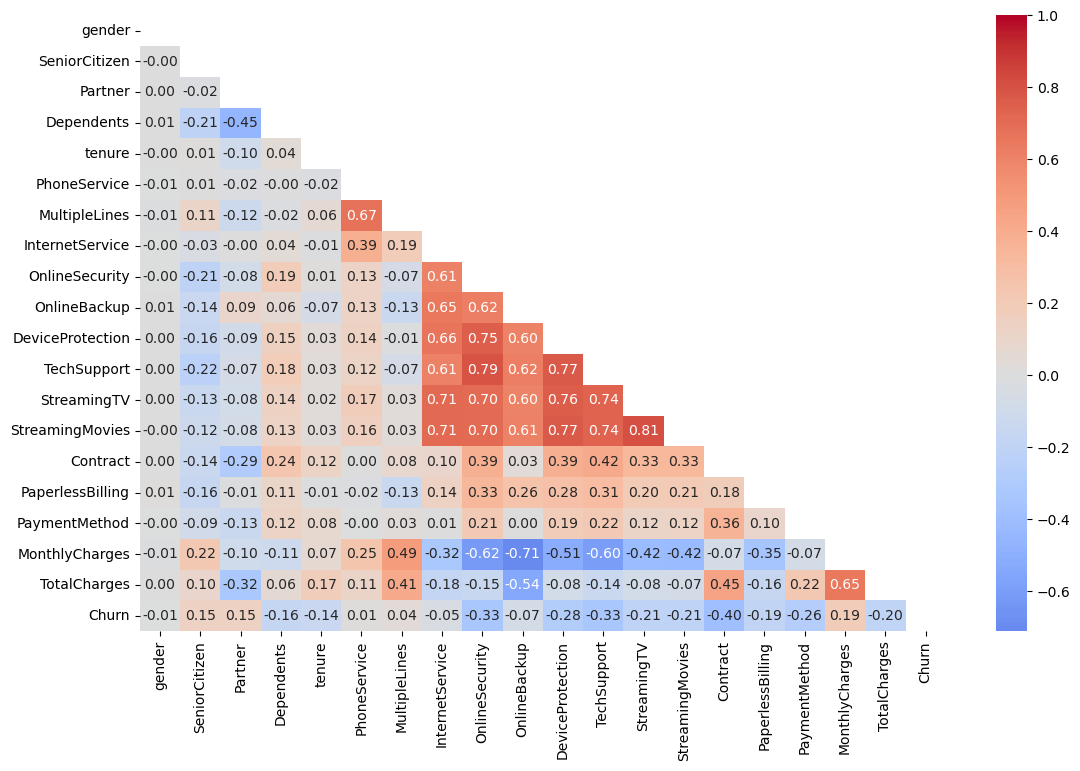

In [42]:
##HeatMap of correplt.figure(figsize=(13,8))
corr = df.apply(lambda x:pd.factorize(x)[0] if x.dtype!= 'float64' else x).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask= mask, cmap= 'coolwarm', vmax= 1, center= 0, annot = True, fmt= '.2f')

In [41]:
## Data in numerinal form 
corr = df.apply(lambda x:pd.factorize(x)[0] if x.dtype!= 'float64' else x)
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,3,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,65,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.50,0
7039,0,0,0,1,21,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.90,0
7040,0,0,0,1,26,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,1,1,0,0,54,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.60,1


# Label Encoder

In [44]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [55]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [54]:
from sklearn.preprocessing import LabelEncoder  # Corrected capitalization of LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Changed from le.fit.transform to le.fit_transform
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [61]:
# Perform log transformation

df['MonthlyCharges'] = np.log(df['MonthlyCharges']+1)
df['TotalCharges'] = np.log(df['TotalCharges']+1)
                    

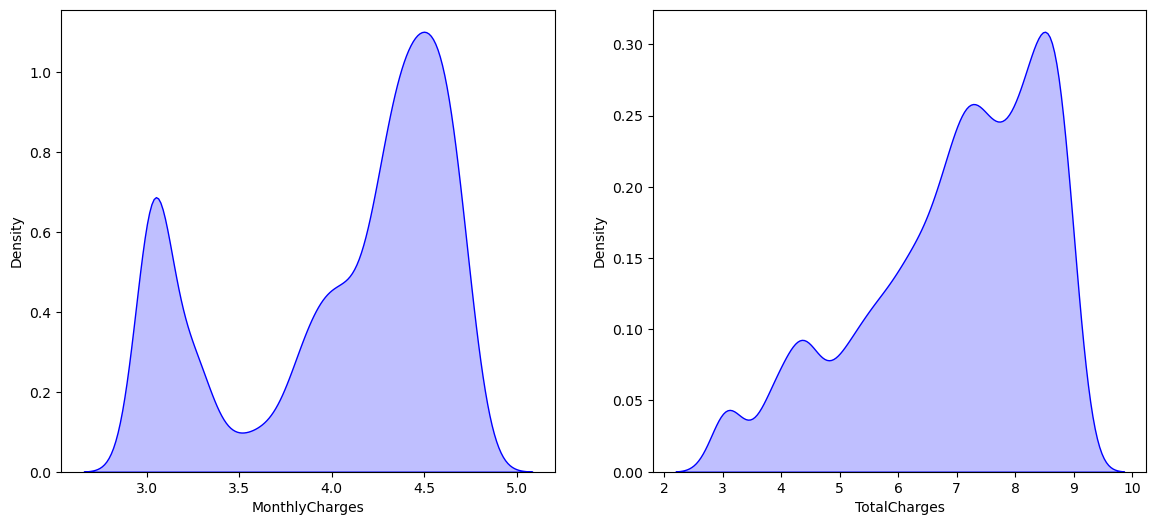

In [62]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.kdeplot(df['MonthlyCharges'], ax= axes[0], color = 'blue', shade= True)

sns.kdeplot(df['TotalCharges'], ax= axes[1], color = 'blue', shade= True)
fig.show()

# Train Test Split

In [63]:
x = df.drop(columns = ['Churn'])
y = df['Churn']

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

# Model Training

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
# or alternatively:
# from sklearn.preprocessing import LabelEncoder

# Option 1: Using OneHotEncoder for categorical features with handle_unknown parameter
# This will prevent errors when new categories are encountered in test data
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Assuming 'Male' is in x_train/x_test, we need to encode it
# This assumes x_train and x_test are DataFrames or similar
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

# Option 2: If you prefer LabelEncoder for binary features
# label_encoder = LabelEncoder()
# x_train['gender'] = label_encoder.fit_transform(x_train['gender'])
# x_test['gender'] = label_encoder.transform(x_test['gender'])

model = LogisticRegression()
model.fit(x_train_encoded, y_train)

# Fixed the syntax error: y.pred → y_pred
y_pred = model.predict(x_test_encoded)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1033
         Yes       0.63      0.55      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
# or alternatively:
# from sklearn.preprocessing import LabelEncoder

# Option 1: Using OneHotEncoder for categorical features with handle_unknown parameter
# This will prevent errors when new categories are encountered in test data
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Assuming 'Male' is in x_train/x_test, we need to encode it
# This assumes x_train and x_test are DataFrames or similar
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

# Option 2: If you prefer LabelEncoder for binary features
# label_encoder = LabelEncoder()
# x_train['gender'] = label_encoder.fit_transform(x_train['gender'])
# x_test['gender'] = label_encoder.transform(x_test['gender'])

model = RandomForestClassifier()
model.fit(x_train_encoded, y_train)

# Fixed the syntax error: y.pred → y_pred
y_pred = model.predict(x_test_encoded)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.89      0.86      1033
         Yes       0.61      0.46      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [95]:
from catboost import CatBoostClassifier

model= CatBoostClassifier(verbose = False)
model.fit( x_train, y_train, cat_features= cat_cols)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1033
         Yes       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [84]:
# Check if 'Churn' is in the list before removing it
if 'Churn' in cat_cols:
    cat_cols.remove('Churn')
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

# Confusion Matrics

<Axes: >

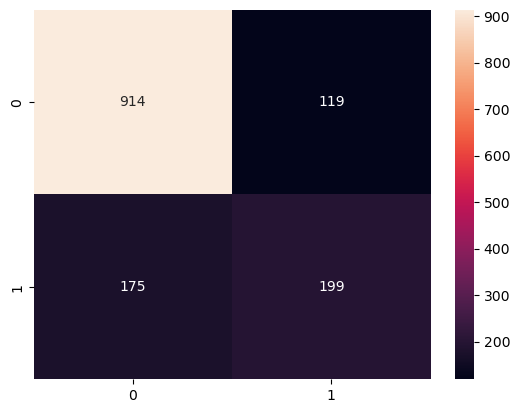

In [93]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt= 'd')

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1033
         Yes       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

